 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [1]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
import statsmodels.api as sm

%matplotlib inline

In [2]:
# Reading whale returns
whales_return_df = pd.read_csv("whale_returns.csv")

In [3]:
# Count nulls
whales_return_df.isna().sum().sum()

4

In [4]:
# Drop nulls
whales_return_df = whales_return_df.dropna()

## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [5]:
# Reading algorithmic returns
algo_returns_df = pd.read_csv("algo_returns.csv")

In [6]:
# Count nulls
algo_returns_df.isna().sum().sum()

6

In [7]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna() 

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_close_df = pd.read_csv("sp_tsx_history.csv")

In [9]:
# Check Data Types
sp_tsx_close_df.dtypes

Date     object
Close    object
dtype: object

In [10]:
# Change string to date time series
whales_return_df['Date'] = pd.to_datetime(whales_return_df['Date'])
whales_return_df = whales_return_df.set_index('Date')
algo_returns_df['Date'] = pd.to_datetime(algo_returns_df['Date'])
algo_returns_df = algo_returns_df.set_index('Date')
sp_tsx_close_df['Date'] = pd.to_datetime(sp_tsx_close_df['Date'])
sp_tsx_close_df = sp_tsx_close_df.set_index('Date')
# Fix Data Types

sp_tsx_close_df['Close'] = sp_tsx_close_df['Close'].str.replace(r'\D', '').astype(float)

In [11]:
# Calculate Daily Returns
sp_tsx_ret_df = pd.DataFrame(sp_tsx_close_df['Close']).pct_change()

In [12]:
# Drop nulls
sp_tsx_ret_df = sp_tsx_ret_df.dropna()

In [13]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_ret_df = sp_tsx_ret_df.rename(columns={"Close":"S&P TSX"})

## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
returns_df = pd.concat([whales_return_df,algo_returns_df,sp_tsx_ret_df], axis=1, join="inner")


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

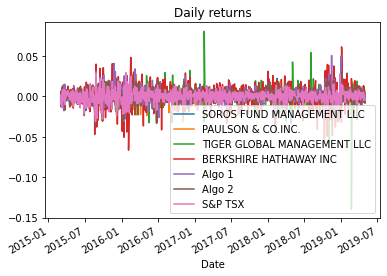

In [15]:
# Plot daily returns of all portfolios
plt.figure
returns_df.plot(title="Daily returns")  

#### Calculate and Plot cumulative returns.

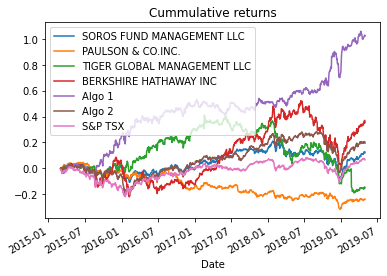

In [16]:
# Calculate cumulative returns of all portfolios

# Plot cumulative returns
((returns_df + 1).cumprod() - 1).plot(title="Cummulative returns")

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


(array([1, 2, 3, 4, 5, 6, 7]), <a list of 7 Text major ticklabel objects>)

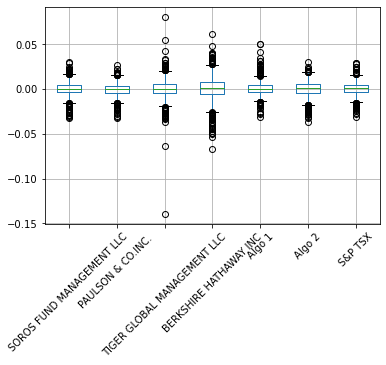

In [17]:
# Box plot to visually show risk
plt.figure
returns_df.boxplot() 
plt.xticks(rotation=45)

### Calculate Standard Deviations

In [18]:
# Calculate the daily standard deviations of all portfolios
returns_std = returns_df.std() 
returns_std = returns_std.rename("std dev") 

### Determine which portfolios are riskier than the S&P TSX 60

In [19]:
# Calculate  the daily standard deviation of S&P TSX 60

# Determine which portfolios are riskier than the S&P TSX 60  

for i, std in enumerate(returns_std):
    if std > returns_std['S&P TSX']:
        print(f" {returns_std.index[i]} is riskier than S&P TSX60")

 SOROS FUND MANAGEMENT LLC is riskier than S&P TSX60
 TIGER GLOBAL MANAGEMENT LLC is riskier than S&P TSX60
 BERKSHIRE HATHAWAY INC is riskier than S&P TSX60
 Algo 1 is riskier than S&P TSX60
 Algo 2 is riskier than S&P TSX60


### Calculate the Annualized Standard Deviation

In [20]:
# Calculate the annualized standard deviation (252 trading days)
ann_std = np.sqrt(252) * returns_std.to_numpy() 
print(ann_std)

[0.12425893 0.11084093 0.17275887 0.20359876 0.12046978 0.13217687
 0.11166395]


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

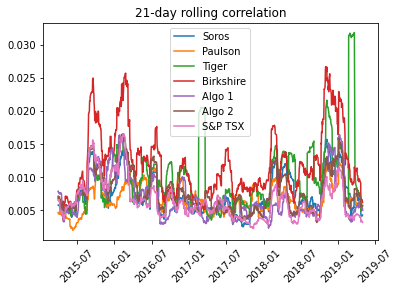

In [21]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window

# Plot the rolling standard deviation
plt.clf()
plt.figure
plt.plot(returns_df.rolling(21).std())
plt.xticks(rotation=45)
plt.title("21-day rolling correlation")
plt.legend(['Soros','Paulson','Tiger','Birkshire','Algo 1','Algo 2','S&P TSX'])

### Calculate and plot the correlation

In [22]:
# Calculate the correlation

# Display de correlation matrix
corr_matrix = returns_df.corr()
print(f"The correlation is {returns_df.corr()}")

# Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
corr_df = corr_matrix.iloc[6,:]
corr_df = corr_df.drop(['S&P TSX'])
print(f" The portfolio that mimics the S&P TSX is {corr_df.idxmax()}")


The correlation is                              SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.697076   
PAULSON & CO.INC.                             0.697076            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.560964            0.433034   
BERKSHIRE HATHAWAY INC                        0.750181            0.540033   
Algo 1                                        0.313795            0.266363   
Algo 2                                        0.826667            0.674015   
S&P TSX                                       0.673930            0.486511   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.560964   
PAULSON & CO.INC.                               0.433034   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.423524   
Algo 1                                          0.161236

### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

The covariance of Algo 1: 5.759114513564969e-05
The var of S&P TSX: 4.947951591513103e-05


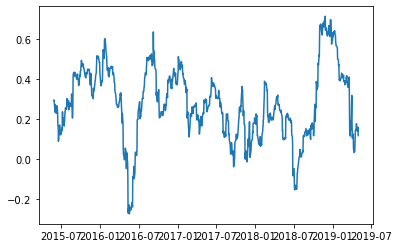

In [23]:


# Calculate the Annualized Standard Deviation.

# Calculate covariance of a single portfolio

# Calculate variance of S&P TSX

# Computing beta

# Plot beta trend
# Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60

myport = "Algo 1"
myindexport = "S&P TSX"
retandindex = pd.concat([returns_df[myindexport],returns_df[myport]], axis=1, join="outer")
mycov = retandindex.rolling(60).cov().unstack()[myindexport][myport]
myvar = returns_df[myindexport].rolling(60).var()
rollbeta = mycov/myvar
plt.figure
plt.plot(rollbeta)

corr_df = corr_matrix.iloc[6,:]
corr_df = corr_df.drop(['S&P TSX'])
corr_df[corr_df==np.max(corr_df)].index[0]
cov_df = returns_df.cov()
var_df = returns_df.var()
tmp_str = "The covariance of "+ cov_df.index[4] + ":"
print("The covariance of "  + cov_df.index[4] +": " + str(cov_df.iloc[4,4]))
print(f"The var of S&P TSX: {var_df.loc['S&P TSX']}")

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [24]:
# Use `ewm` to calculate the rolling window
alpha = 1-np.exp(-np.log(2)/21)
returns_df.ewm(halflife=alpha).mean()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P TSX
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555
...,...,...,...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848,0.000682,-0.007247,-0.000628
2019-04-26,0.008149,0.009162,0.012355,0.010434,0.002981,0.005256,0.002254
2019-04-29,0.001254,0.002719,0.006251,0.005223,0.005208,0.002829,-0.000788


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

<BarContainer object of 7 artists>

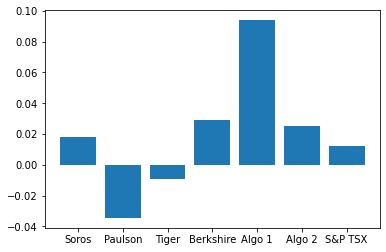

In [25]:
# Annualized Sharpe Ratios
mean_df = returns_df.mean()
std_df = returns_df.std()
sharpe_rat = mean_df/std_df
labels=['Soros','Paulson','Tiger','Berkshire','Algo 1','Algo 2','S&P TSX']
plt.xticks(range(len(sharpe_rat)),labels)
plt.bar(labels,sharpe_rat)


<BarContainer object of 7 artists>

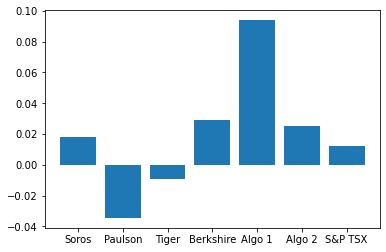

In [26]:
# Visualize the sharpe ratios as a bar plot
labels=['Soros','Paulson','Tiger','Berkshire','Algo 1','Algo 2','S&P TSX']
plt.xticks(range(len(sharpe_rat)),labels)
plt.bar(labels,sharpe_rat)

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

Write your answer here!

--- Both Algo 1 and Algo 2 outperformed S&P TSX60
--- Algo 1 outperformed all the whales portfolios
--- Algo 2 outperformed all whales portfoliolios except Berkshire portfolio.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [27]:
# Reading data from 1st stock
AMR_df = pd.read_csv("AMR.csv", skiprows=27, nrows=500)
AMR_df = AMR_df.drop(list(AMR_df.columns)[0], axis=1)
AMR_df['Date'] = pd.to_datetime(AMR_df['Date'])
AMR_df = AMR_df.reset_index().set_index('Date')

In [28]:
# Reading data from 2nd stock
GLD_df = pd.read_csv("GLD.csv", skiprows=27, nrows=500)
GLD_df = GLD_df.drop(list(GLD_df.columns)[0], axis=1)
GLD_df['Date'] = pd.to_datetime(GLD_df['Date'])
GLD_df = GLD_df.reset_index().set_index('Date')

In [29]:
# Reading data from 3rd stock
TSLA_df = pd.read_csv("TSLA.csv", skiprows=27, nrows=500)
TSLA_df = TSLA_df.drop(list(TSLA_df.columns)[0], axis=1)
TSLA_df['Date'] = pd.to_datetime(TSLA_df['Date'])
TSLA_df = TSLA_df.reset_index().set_index('Date')
TSLA_df['Close'] = TSLA_df['Close'].str.replace(r'\D', '').astype(float)

# Reading data for S&P TSX60
SPTSX_df = pd.read_csv("SPTSX.csv", skiprows=27, nrows=500)
SPTSX_df = SPTSX_df.drop(list(SPTSX_df.columns)[0], axis=1)
SPTSX_df['Date'] = pd.to_datetime(SPTSX_df['Date'])
SPTSX_df = SPTSX_df.reset_index().set_index('Date')

In [30]:
# Combine all stocks in a single DataFrame
myport_df = pd.concat([AMR_df['Close'],GLD_df['Close'],TSLA_df['Close']], axis=1,join="outer")

In [31]:
# Reorganize portfolio data by having a column per symbol
myport_df.columns = ['AMR','GLD','TSLA']

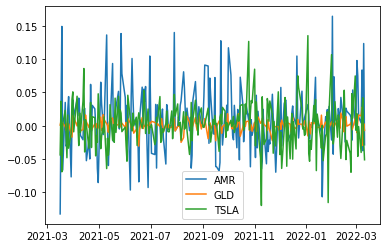

In [32]:
# Calculate daily returns
portret_df = myport_df.pct_change()
# Drop NAs
portret_df = portret_df.dropna()
# Display sample data
portret_df
plt.plot(portret_df)
plt.legend(['AMR','GLD','TSLA'])

## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

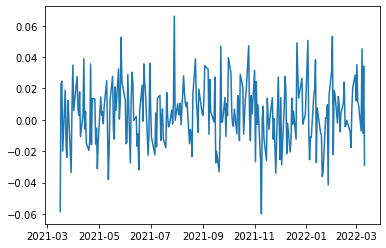

In [33]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portavgret_df = pd.DataFrame(portret_df.mean(axis=1))
portavgret_df.columns = ['MyPort']
# Display sample data
portavgret_df
plt.plot(portavgret_df)

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [34]:
# Join your returns DataFrame to the original returns DataFrame
allret_df = pd.concat([portavgret_df,portret_df],axis=1, join="outer")

In [35]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
allret_df = allret_df.dropna()

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [36]:
# Calculate the annualized `std`
allret_df.std()*16

MyPort    0.323290
AMR       0.734755
GLD       0.134690
TSLA      0.539515
dtype: float64

### Calculate and plot rolling `std` with 21-day window

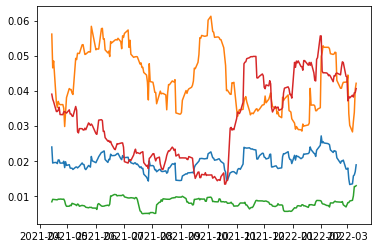

In [37]:
# Calculate rolling standard deviation

# Plot rolling standard deviation

plt.figure
plt.plot(allret_df.rolling(21).std())

### Calculate and plot the correlation

In [38]:
# Calculate and plot the correlation
corr_matrix = allret_df.corr()
print(f"The correlation is {returns_df.corr()}")

The correlation is                              SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
SOROS FUND MANAGEMENT LLC                     1.000000            0.697076   
PAULSON & CO.INC.                             0.697076            1.000000   
TIGER GLOBAL MANAGEMENT LLC                   0.560964            0.433034   
BERKSHIRE HATHAWAY INC                        0.750181            0.540033   
Algo 1                                        0.313795            0.266363   
Algo 2                                        0.826667            0.674015   
S&P TSX                                       0.673930            0.486511   

                             TIGER GLOBAL MANAGEMENT LLC  \
SOROS FUND MANAGEMENT LLC                       0.560964   
PAULSON & CO.INC.                               0.433034   
TIGER GLOBAL MANAGEMENT LLC                     1.000000   
BERKSHIRE HATHAWAY INC                          0.423524   
Algo 1                                          0.161236

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

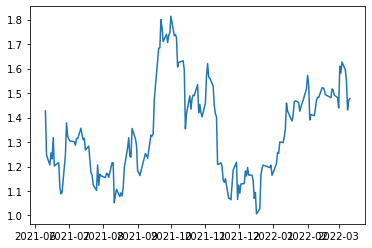

In [39]:
# Calculate and plot Beta
sptsxret = SPTSX_df['Close'].pct_change()
sptsxret = sptsxret.rename('SPTSX')
portvsindex_df = pd.concat([allret_df['MyPort'],sptsxret], axis=1, join="outer")
portvsindex_df = portvsindex_df.dropna()

sptsxret = SPTSX_df['Close'].pct_change()
sptsxret = sptsxret.rename('SPTSX')
portvsindex_df = pd.concat([allret_df['MyPort'],sptsxret], axis=1, join="outer")
portvsindex_df = portvsindex_df.dropna()
mycov = portvsindex_df.rolling(60).cov().unstack()['SPTSX']['MyPort']
myvar = portvsindex_df['SPTSX'].rolling(60).var()
portrollbeta = mycov/myvar                                
plt.plot(portrollbeta)

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [40]:
# Calculate Annualized Sharpe Ratios
allretandindex_df = pd.concat([allret_df,sptsxret], axis=1, join="outer")
allretandindex_df = allretandindex_df.dropna()
sharpe_rat = allretandindex_df.mean()*252/(allretandindex_df.std()*16)

<BarContainer object of 5 artists>

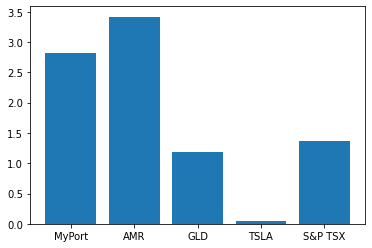

In [41]:
# Visualize the sharpe ratios as a bar plot
labels=['MyPort','AMR','GLD','TSLA','S&P TSX']
plt.xticks(range(len(sharpe_rat)),labels)
plt.bar(labels,sharpe_rat)


### How does your portfolio do?

Write your answer here!

In [ ]:
My portfolio's return outperformned GLD,TSLA and S&P TSX60 for every unit of risk but underperformed AMR